# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc

In [6]:
df = pd.read_csv("customer_data.csv")
print(df.head())
print(df.info())
print(df.describe())
print(type(df))

  CustomerID   Age  Gender    Income  Tenure  ProductType  SupportCalls  \
0   CUST0000  59.0       0  151203.0     4.0            0           1.0   
1   CUST0001  69.0       0   58332.0     6.0            1           9.0   
2   CUST0002  46.0       1  149481.0     2.0            0          12.0   
3   CUST0003  32.0       1  115937.0     1.0            1          13.0   
4   CUST0004  60.0       0  103929.0     4.0            1           5.0   

   ChurnStatus  
0            0  
1            0  
2            0  
3            0  
4            0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    3500 non-null   object 
 1   Age           3325 non-null   float64
 2   Gender        3500 non-null   int64  
 3   Income        3328 non-null   float64
 4   Tenure        3325 non-null   float64
 5   ProductType   3500 non-null   int64

# Data Cleaning: Mean Imputation for Missing Values

## Code Overview

```python
# Step 1: Check missing values
print(df.isnull().sum())

# Step 2: Create dictionary of missing counts
dic = df.isnull().sum().to_dict()

# Step 3: Fill missing values with mean
mean = {}
for x in dic.keys():
    if dic[x] != 0:
        mean[x] = df.describe().to_dict()[x]["mean"]
        df[x] = df[x].fillna(df[x].mean())

# Step 4: Verify completion
print(df.isnull().sum())
```

---

## Step-by-Step Explanation

### Step 1: Initial Check
```
CustomerID        0
Age             175
Gender            0
Income          172
Tenure          175
ProductType       0
SupportCalls    171
ChurnStatus       0
```
- `df.isnull()` creates True/False DataFrame (True = missing)
- `.sum()` counts True values per column
- Result: 4 columns need filling (Age, Income, Tenure, SupportCalls)

### Step 2: Dictionary Conversion
```python
dic = {'CustomerID': 0, 'Age': 175, 'Income': 172, 'Tenure': 175,
       'Gender': 0, 'ProductType': 0, 'SupportCalls': 171, 'ChurnStatus': 0}
```

### Step 3: Fill with Mean
- Loop through each column
- If missing values exist (`dic[x] != 0`):
  - Calculate and store the mean
  - Replace NaN values with that mean using `.fillna()`

### Step 4: Verification
```
CustomerID      0
Age             0
Income          0
Tenure          0
ProductType     0
SupportCalls    0
ChurnStatus     0
```
✓ All missing values filled successfully

---

## Summary

| Column | Before | After | Action |
|--------|--------|-------|--------|
| Age | 175 | 0 | Filled with mean |
| Income | 172 | 0 | Filled with mean |
| Tenure | 175 | 0 | Filled with mean |
| SupportCalls | 171 | 0 | Filled with mean |
| Others | 0 | 0 | No action needed |

**Total cleaned:** 693 missing values across 4 columns

---

## Key Points

**Advantages:**
- Simple and fast
- Preserves column mean

**Limitations:**
- Reduces data variance
- Not ideal for skewed data
- Assumes missing data is random

**Alternatives:** Median imputation, KNN imputation, forward/backward fill, predictive models

In [7]:
print(df.isnull().sum())
dic = df.isnull().sum().to_dict()
mean = {}
for x in dic.keys():
    if dic[x] != 0:
        mean[x] = df.describe().to_dict()[x]["mean"]
        df[x] = df[x].fillna(df[x].mean())

print(df.isnull().sum())


CustomerID        0
Age             175
Gender            0
Income          172
Tenure          175
ProductType       0
SupportCalls    171
ChurnStatus       0
dtype: int64
CustomerID      0
Age             0
Gender          0
Income          0
Tenure          0
ProductType     0
SupportCalls    0
ChurnStatus     0
dtype: int64


# Outlier Detection and Capping using IQR Method

## Overview

This code detects outliers in `SupportCalls` and `Income` columns using the IQR (Interquartile Range) rule, then caps them to prevent extreme values from distorting analysis.

---

## Code Implementation

### For SupportCalls Column

```python
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df["SupportCalls"].quantile(0.25)
Q3 = df["SupportCalls"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Step 3: Cap outliers
df["SupportCalls"] = df["SupportCalls"].clip(lower=lower_limit, upper=upper_limit)
```

### For Income Column

```python
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Step 3: Cap outliers
df["Income"] = df["Income"].clip(lower=lower_limit, upper=upper_limit)
```

---

## Step-by-Step Breakdown

### Step 1: Calculate Quartiles and IQR

```python
Q1 = df["SupportCalls"].quantile(0.25)  # 25th percentile
Q3 = df["SupportCalls"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1                           # Interquartile Range
```

**What each value represents:**
- **Q1 (First Quartile)**: 25% of data falls below this value
- **Q3 (Third Quartile)**: 75% of data falls below this value
- **IQR**: Measures the spread of the middle 50% of the data

**Example:**
```
Q1 = 2    (25% of customers made ≤2 support calls)
Q3 = 5    (75% of customers made ≤5 support calls)
IQR = 3   (middle 50% spans 3 calls)
```

---

### Step 2: Define Outlier Limits

```python
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
```

**The 1.5 × IQR Rule:**
- Standard method for detecting outliers
- Values beyond these limits are considered outliers

**Example calculation:**
```
lower_limit = 2 - 1.5 * 3 = -2.5
upper_limit = 5 + 1.5 * 3 = 9.5
```

**Interpretation:**
- Values **below -2.5** = low outliers
- Values **above 9.5** = high outliers
- Values **between -2.5 and 9.5** = normal range

---

### Step 3: Cap Outliers with `.clip()`

```python
df["SupportCalls"] = df["SupportCalls"].clip(lower=lower_limit, upper=upper_limit)
```

**How `.clip()` works:**
- If value **< lower_limit** → replace with `lower_limit`
- If value **> upper_limit** → replace with `upper_limit`
- If value **within range** → keep unchanged

**Example transformation:**

| Original Value | Lower Limit | Upper Limit | After Clipping |
|----------------|-------------|-------------|----------------|
| 1 | -2.5 | 9.5 | 1 (unchanged) |
| 15 | -2.5 | 9.5 | 9.5 (capped) |
| -5 | -2.5 | 9.5 | -2.5 (capped) |
| 7 | -2.5 | 9.5 | 7 (unchanged) |

**Key point:** Rows are NOT removed, only extreme values are adjusted.

---

## Visual Representation

```
Data Distribution with IQR:

    Outliers          Normal Range          Outliers
        ↓            ↙──────────↘              ↓
    ----[====|████████████████|====]----
        ↑    ↑                ↑    ↑
     Lower  Q1               Q3  Upper
     Limit                      Limit

     ←1.5×IQR→                ←1.5×IQR→
```

---

## Summary

### What This Code Does

1. **Calculates** the middle 50% range (IQR) for each column
2. **Identifies** outliers using the 1.5 × IQR rule
3. **Caps** extreme values to the defined limits (not deletion)
4. **Preserves** all rows in the dataset

### Why Use This Method?

**Advantages:**
- Retains all data points
- Reduces impact of extreme values
- Based on statistical distribution (not arbitrary thresholds)
- Works well for skewed data

**When to Use:**
- Machine learning models sensitive to outliers
- Visualization where extreme values distort scale
- When outliers are measurement errors, not genuine extremes

**Alternatives:**
- **Remove outliers**: Delete rows beyond limits
- **Log transformation**: For heavily skewed data
- **Winsorization**: Similar to clipping
- **Z-score method**: For normally distributed data

In [9]:
Q1 = df["SupportCalls"].quantile(0.25)
Q3 = df["SupportCalls"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap the values at [lower_limit, upper_limit]
df["SupportCalls"] = df["SupportCalls"].clip(lower=lower_limit, upper=upper_limit)
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap the values at [lower_limit, upper_limit]
df["Income"] = df["Income"].clip(lower=lower_limit, upper=upper_limit)

# Train-Validation-Test Split Guide

## Overview

This code splits a dataset into three parts: training set (2500 samples), validation set (500 samples), and test set (500 samples) for machine learning model development.

---

## Step-by-Step Breakdown

### Step 1: Prepare Target and Features

```python
y = df["ChurnStatus"]
x = df.drop("ChurnStatus", axis=1)
x = x.drop("CustomerID", axis=1)
```

**What's happening:**
- `y` = target variable (what we're predicting): `ChurnStatus`
- `x` = input features (everything else except):
  - `ChurnStatus` (removed because it's the target)
  - `CustomerID` (removed because it's just an identifier, not useful for prediction)

**Result:**
- `x` → all predictive features (Age, Income, Tenure, SupportCalls, etc.)
- `y` → labels to predict (Churn: Yes/No)

---

### Step 2: First Split (Test Set Separation)

```python
X_temp, X_test, y_temp, y_test = train_test_split(
    x, y,
    test_size=500,
    random_state=42,
    shuffle=True
)
```

**Parameters explained:**
- `test_size=500` → exactly **500 samples** go to test set (not a percentage, it's a count)
- `shuffle=True` → rows are randomly shuffled before splitting
- `random_state=42` → makes the split reproducible (same split every time)

**Result:**
- `X_test, y_test` → **500 samples** (test set - kept aside until final evaluation)
- `X_temp, y_temp` → **3000 samples** (temporary set for further splitting)

**Visual representation:**
```
Original Dataset (3500 samples)
        ↓
    ┌───────────────┐
    │               │
X_temp, y_temp   X_test, y_test
(3000 samples)   (500 samples)
```

---

### Step 3: Second Split (Training and Validation)

```python
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=500,
    random_state=42,
    shuffle=True
)
```

**What's happening:**
- Split the temporary set (3000 samples) into training and validation
- `test_size=500` → 500 samples for validation
- Remaining samples (3000 - 500 = 2500) go to training

**Result:**
- `X_train, y_train` → **2500 samples** (for model training)
- `X_val, y_val` → **500 samples** (for hyperparameter tuning)

**Visual representation:**
```
X_temp, y_temp (3000 samples)
        ↓
    ┌───────────────┐
    │               │
X_train, y_train  X_val, y_val
(2500 samples)    (500 samples)
```

---

### Step 4: Verify Split Sizes

```python
print("Train size:", len(X_train))  # 2500
print("Val size:  ", len(X_val))    # 500
print("Test size: ", len(X_test))   # 500
```

**Output:**
```
Train size: 2500
Val size:   500
Test size:  500
```

---

## Complete Split Overview

```
                Original Dataset
                 (3500 samples)
                       |
        ┌──────────────┴──────────────┐
        |                             |
   X_temp, y_temp                X_test, y_test
   (3000 samples)                 (500 samples)
        |                          [FINAL TEST]
   ┌────┴────┐
   |         |
X_train   X_val
y_train   y_val
(2500)    (500)
[TRAIN]   [TUNE]
```

---

## Purpose of Each Set

| Set | Size | Percentage | Purpose |
|-----|------|------------|---------|
| **Training** | 2500 | 71.4% | Fit the model (learn patterns) |
| **Validation** | 500 | 14.3% | Tune hyperparameters, compare models |
| **Test** | 500 | 14.3% | Final evaluation (never touched during training) |
| **Total** | 3500 | 100% | |

---

## Why Three Splits?

### Training Set
- Used to **train/fit** the model
- Model learns patterns from this data
- Largest portion of data

### Validation Set
- Used to **tune** hyperparameters (learning rate, regularization, etc.)
- Helps **compare** different models or configurations
- Prevents overfitting to training data
- Can be used multiple times during development

### Test Set
- Used **only once** for final evaluation
- Provides **unbiased estimate** of model performance
- Simulates real-world performance
- **Never** used during training or tuning

---

## Key Parameters

### `test_size`
- **Integer (e.g., 500)**: Exact number of samples
- **Float (e.g., 0.2)**: Percentage of dataset (20%)

### `random_state`
- **Purpose**: Makes split reproducible
- **Value**: Any integer (commonly 42)
- **Effect**: Same random split every time you run the code

### `shuffle`
- **True**: Randomly shuffle data before splitting (recommended)
- **False**: Split data in order (useful for time-series)

---



In [10]:
y = df["ChurnStatus"]
x = df.drop("ChurnStatus", axis=1)
x = x.drop("CustomerID", axis=1)
X_temp, X_test, y_temp, y_test = train_test_split(
    x, y,
    test_size=500,
    random_state=42,
    shuffle=True
)


X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=500,
    random_state=42,
    shuffle=True
)
print("Train size:", len(X_train))
print("Val size:  ", len(X_val))
print("Test size: ", len(X_test))

Train size: 2500
Val size:   500
Test size:  500


In [11]:
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


# Classification Metrics Function Guide

## Code

```python
def metrics(x, y, model):
    y_pred = model.predict(x)
    return [
        accuracy_score(y, y_pred),
        precision_score(y, y_pred),
        recall_score(y, y_pred)
    ]
```

**Returns:** `[accuracy, precision, recall]`

---

## How It Works

### Step 1: Generate Predictions
```python
y_pred = model.predict(x)
```
- Takes input features `x` and generates predicted labels
- `y` = true labels (ground truth)
- `y_pred` = predicted labels (model output)

### Step 2: Calculate Three Metrics
Returns a list of three scores based on the confusion matrix.

---

## Confusion Matrix Components

|  | **Predicted 0** | **Predicted 1** |
|---|---|---|
| **Actual 0** | TN (True Negative) | FP (False Positive) |
| **Actual 1** | FN (False Negative) | TP (True Positive) |

- **TP**: Predicted 1, Actual 1 ✓
- **TN**: Predicted 0, Actual 0 ✓
- **FP**: Predicted 1, Actual 0 ✗
- **FN**: Predicted 0, Actual 1 ✗

---

## Metric 1: Accuracy

```python
accuracy_score(y, y_pred)
```

**What it measures:** Overall correctness

### Formula

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**In words:** Correct predictions / Total predictions

---

## Metric 2: Precision

```python
precision_score(y, y_pred)
```

**What it measures:** When model predicts positive, how often is it correct?

### Formula

$$\text{Precision} = \frac{TP}{TP + FP}$$

**In words:** True positives / All predicted positives

**Focus:** Penalizes false alarms (FP)

---

## Metric 3: Recall

```python
recall_score(y, y_pred)
```

**What it measures:** Of all actual positives, how many did model catch?

### Formula

$$\text{Recall} = \frac{TP}{TP + FN}$$

**In words:** True positives / All actual positives

**Focus:** Penalizes missed positives (FN)

---

## Summary

| Metric | Formula | Meaning |
|--------|---------|---------|
| **Accuracy** | $\frac{TP + TN}{TP + TN + FP + FN}$ | What % of all predictions are correct? |
| **Precision** | $\frac{TP}{TP + FP}$ | When model says "positive", how often is it right? |
| **Recall** | $\frac{TP}{TP + FN}$ | What % of actual positives did we catch? |

In [12]:
def metrics(x, y, model):
    y_pred = model.predict(x)
    return [
            accuracy_score(y, y_pred),
            precision_score(y, y_pred),
            recall_score(y, y_pred)
        ]


# Polynomial Logistic Regression with ROC Analysis

---

## Step 1: Feature Scaling

```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)
```

**What StandardScaler does:**
- Transforms each feature to have:
  - **Mean ≈ 0**
  - **Standard deviation ≈ 1**

**Why it matters:**
- Prevents features with large values from dominating
- Essential for Logistic Regression and polynomial features
- Ensures all features contribute equally

**Important:**
- `fit_transform` on train: learns mean/std from training data
- `transform` on val/test: applies training statistics (no data leakage)

---

## Step 2: Polynomial Features

```python
for d in [2, 5, 9]:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_val_poly   = poly.transform(X_val_scaled)
    X_test_poly  = poly.transform(X_test_scaled)
```

**What PolynomialFeatures does:**

Creates new features by combining existing ones with powers and interactions.

**Example transformations:**

**Degree 2:**
$$x_1, x_2 \rightarrow x_1, x_2, x_1^2, x_1 x_2, x_2^2$$

**Degree 5:**
$$\text{Includes: } x_1^3, x_1^2 x_2, x_1^5, \text{etc.}$$

**Degree 9:**
$$\text{Many more terms: } x_1^9, x_1^8 x_2, \text{etc.}$$

**Trade-off:**
- **Higher degree** = more complex model = more flexibility
- **Risk:** Can overfit (memorize noise instead of learning patterns)

---

## Step 3: Train Logistic Regression

```python
model = LogisticRegression(max_iter=6000)
model.fit(X_train_poly, y_train)
```

- Trains classifier on polynomial features
- `max_iter=6000`: ensures optimizer converges

---

## Step 4: Evaluate Metrics

```python
print(f"val:{metrics(X_val_poly, y_val, model)}")
print(f"test: {metrics(X_test_poly, y_test, model)}")
```

Returns: `[accuracy, precision, recall]`

**Results from your output:**

### Degree 2
```
val:  [0.98, 0.737, 0.737]
test: [0.984, 0.833, 0.75]
```

### Degree 5
```
val:  [0.98, 0.789, 0.789]
test: [0.976, 0.727, 0.8]
```

### Degree 9
```
val:  [0.98, 0.737, 0.737]
test: [0.968, 0.722, 0.765]
```

**Observation:** All models have high accuracy, but test performance varies

---

## Step 5: ROC Curve and AUC

```python
y_prob = model.predict_proba(X_test_poly)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
AUC = auc(fpr, tpr)
```

### Understanding ROC Components

**Predicted probabilities:**
```python
y_prob = model.predict_proba(X_test_poly)[:, 1]
```
- Probability of class 1 (churn) for each sample

**ROC Curve:**
```python
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
```

Computes at many thresholds:

**FPR (False Positive Rate):**
$$\text{FPR} = \frac{FP}{FP + TN}$$
- X-axis: What fraction of negatives are incorrectly classified as positive?

**TPR (True Positive Rate = Recall):**
$$\text{TPR} = \frac{TP}{TP + FN}$$
- Y-axis: What fraction of positives are correctly identified?

**AUC (Area Under Curve):**
```python
AUC = auc(fpr, tpr)
```
- Measures overall model performance
- **1.0** = perfect classifier
- **0.5** = random guessing
- **Higher is better**

---

## Step 6: Visualize ROC

```python
plt.plot(fpr, tpr, linewidth=2)          # Model performance (blue)
plt.plot([0,1], [0,1], '--')             # Random classifier (orange dashed)
```

**How to read the plot:**
- **Blue curve**: Your model's performance
- **Orange dashed line**: Random classifier baseline
- **Closer to top-left corner** = better model
- **Closer to diagonal** = worse (approaching random)

---

## Results Analysis

### Degree 2
- **AUC ≈ 0.992**
- ROC curve hugs top-left corner
- Excellent performance
- **Verdict:** ✓ Best balance

### Degree 5
- **AUC ≈ 0.989**
- Still very good, slightly lower than degree 2
- Slightly more complex
- **Verdict:** ✓ Still good

### Degree 9
- **AUC ≈ 0.945**
- Noticeably worse than 2 and 5
- ROC curve pulls away from top-left
- **Verdict:** ✗ Overfitting (too complex)

---

## Model Comparison Summary

| Degree | AUC | Test Accuracy | Test Precision | Test Recall | Interpretation |
|--------|-----|---------------|----------------|-------------|----------------|
| **2** | 0.992 | 0.984 | 0.833 | 0.75 | ✓ Best overall |
| **5** | 0.989 | 0.976 | 0.727 | 0.8 | ✓ Good alternative |
| **9** | 0.945 | 0.968 | 0.722 | 0.765 | ✗ Overfitting |

---

## Key Takeaways

### Why Degree 2 Wins
- Highest AUC (0.992)
- Best test accuracy (0.984)
- Good balance of precision and recall
- Simple enough to generalize well

### Why Degree 9 Fails
- Much lower AUC (0.945)
- Too many features (high complexity)
- **Overfitting:** Memorizes training noise
- Poor generalization to test data

### The Bias-Variance Tradeoff
- **Too simple (degree 1)**: Underfitting (high bias)
- **Just right (degree 2-5)**: Good balance
- **Too complex (degree 9)**: Overfitting (high variance)

---

## ROC Curve Interpretation Guide

```
Perfect Classifier          Good Classifier         Poor Classifier
     (AUC = 1.0)              (AUC = 0.8-0.99)        (AUC ≈ 0.5)

TPR                         TPR                     TPR
 1  ┌──────┐                1  ┌────╮               1  ╱
    │      │                   ╱     ╲                 ╱
    │      │                  ╱       ╲               ╱
    │      │                 ╱         ╲             ╱
 0  └──────┘                ╱           ╲           ╱
    0      1 FPR            0            1 FPR      0    1 FPR
```

**Your results:**
- Degree 2: Approaching perfect classifier
- Degree 5: Still very good
- Degree 9: Moving toward poor performance

val:[0.98, 0.7368421052631579, 0.7368421052631579]
test: [0.984, 0.8333333333333334, 0.75]


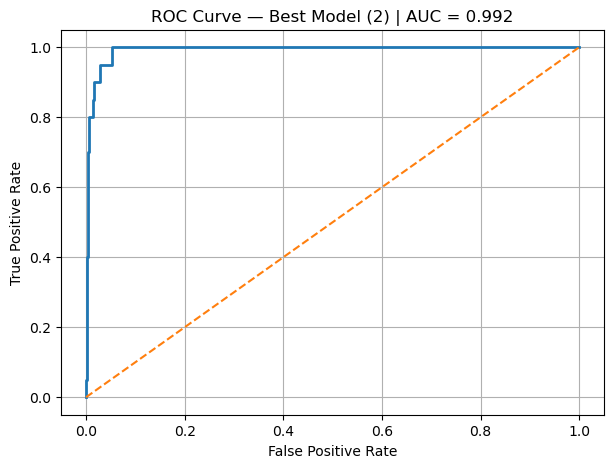

val:[0.98, 0.6956521739130435, 0.8421052631578947]
test: [0.978, 0.6551724137931034, 0.95]


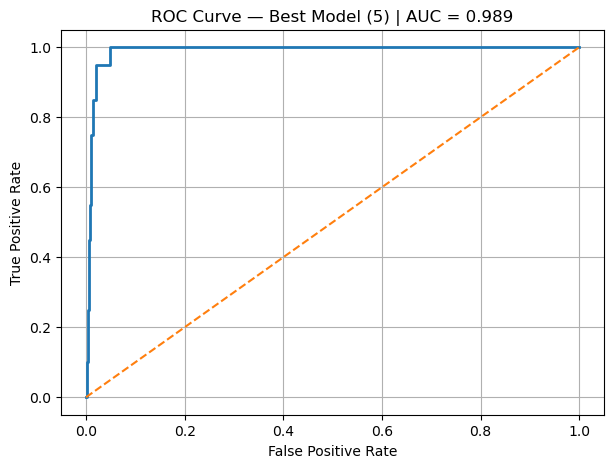

val:[0.984, 0.7619047619047619, 0.8421052631578947]
test: [0.98, 0.6923076923076923, 0.9]


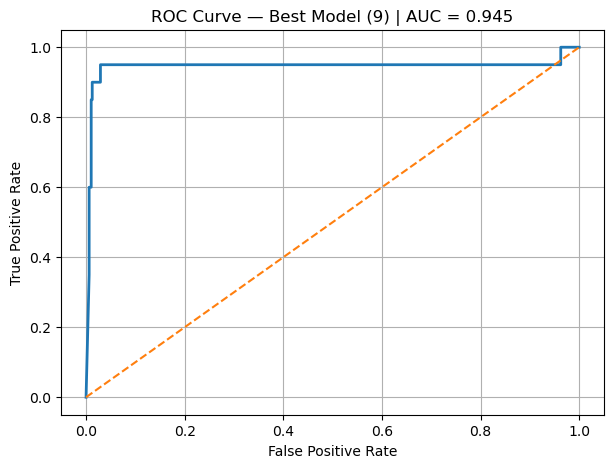

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

for d in [2, 5, 9]:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_val_poly   = poly.transform(X_val_scaled)
    X_test_poly  = poly.transform(X_test_scaled)

    model = LogisticRegression(max_iter=6000)
    model.fit(X_train_poly, y_train)
    print(f"val:{metrics(X_val_poly, y_val, model)}")
    print(f"test: {metrics(X_test_poly, y_test, model)}")
    y_prob = model.predict_proba(X_test_poly)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    AUC = auc(fpr, tpr)

    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], '--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve — Best Model ({d}) | AUC = {AUC:.3f}")
    plt.grid(True)
    plt.show()


# Logistic Regression: Math and Implementation

## 1. Sigmoid Function

**Formula**:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**Purpose**: Converts any real number to a probability (0, 1)
```python
def sigmoid(z):
    return 1.0/(1+np.exp(-z))
```

**Key properties**:
- $\sigma(0) = 0.5$
- $\sigma(\text{large positive}) \to 1$
- $\sigma(\text{large negative}) \to 0$

## 2. The Model

**Linear score**:

$$z = Xw = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n$$

**Probability**:

$$P(y=1|X) = \sigma(Xw) = \frac{1}{1 + e^{-Xw}}$$
```python
z = X_train_poly.dot(w)        # z = Xw
y_hit = sigmoid(z)              # P(y=1) = σ(z)
```

## 3. Loss Function

**Cross-entropy loss** (for single sample):

$$L(w) = -[y \log(\hat{y}) + (1-y) \log(1-\hat{y})]$$

**For m samples**:

$$J(w) = -\frac{1}{m} \sum_{i=1}^{m} [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]$$

Where $\hat{y}_i = \sigma(X_iw)$

**Why**: Heavily penalizes confident wrong predictions, convex (has global minimum)

## 4. Gradient

**Formula**:

$$\nabla_w J(w) = \frac{\partial J}{\partial w} = \frac{1}{m} X^T (\hat{y} - y)$$

Where:
- $(\hat{y} - y)$: prediction error
- $X^T$: feature matrix transpose
- $\frac{1}{m}$: average over samples

**Derivation steps**:
1. Start with $J(w) = -\frac{1}{m} \sum [y \log(\sigma(Xw)) + (1-y) \log(1-\sigma(Xw))]$
2. Apply chain rule: $\frac{\partial J}{\partial w} = \frac{\partial J}{\partial \hat{y}} \times \frac{\partial \hat{y}}{\partial z} \times \frac{\partial z}{\partial w}$
3. Key property: $\frac{\partial \sigma(z)}{\partial z} = \sigma(z)(1-\sigma(z))$
4. After simplification: $\nabla_w J(w) = \frac{1}{m} X^T (\hat{y} - y)$
```python
grad = (1.0/m) * (X_train_poly.T.dot(y_hit - y_train))
```

## 5. Gradient Descent

**Update rule**:

$$w^{(t+1)} = w^{(t)} - \eta \nabla_w J(w^{(t)})$$

Where:
- $w^{(t)}$: weights at iteration $t$
- $\eta$: learning rate (step size)
- $\nabla_w J(w^{(t)})$: gradient at current weights
```python
def GradientDecent(m, epoch, learning_rate, X_train_poly, w, y_train):
    for _ in range(epoch):
        z = X_train_poly.dot(w)                                # Forward pass
        y_hit = sigmoid(z)
        grad = (1.0/m) * (X_train_poly.T.dot(y_hit - y_train)) # Gradient
        w = w - learning_rate * grad                           # Update
    return w
```

**Process**:
1. Start with $w = 0$
2. Compute gradient (steepest ascent direction)
3. Move opposite direction (descend)
4. Repeat for 10,000 iterations

## 6. Making Predictions

**Probability**:

$$\hat{y} = P(y=1|X) = \sigma(Xw)$$
```python
def predict_output(x, w):
    return sigmoid(np.dot(x, w))
```

**Class label** (using threshold):

$$\hat{y}_{\text{class}} = \begin{cases}
1 & \text{if } P(y=1|X) \geq \text{threshold} \\
0 & \text{otherwise}
\end{cases}$$
```python
def predict(X, w, threshold=0.5):
    proba = predict_output(X, w)
    return (proba >= threshold).astype(int).ravel()
```

Default: If $P(y=1) \geq 0.5$ → predict 1, else → predict 0

## 7. Polynomial Features

**Transformation**: For features $[x_1, x_2]$ with degree $d=2$:

$$[1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$$

**General form for degree $d$**:

$$\phi(x) = [1, x_1, \ldots, x_n, x_1^2, x_1x_2, \ldots, x_n^2, \ldots, x_1^d, \ldots, x_n^d]$$
```python
poly = PolynomialFeatures(degree=d, include_bias=True)
X_train_poly = poly.fit_transform(X_train_scaled)
```

**Effect**:
- $d=1$: linear decision boundary
- $d \geq 2$: curved decision boundaries
- Higher $d$ → more complex, risk of overfitting

**Feature count growth**:
- $d=2$: 21 features
- $d=5$: 126 features
- $d=9$: 715 features

## 8. Evaluation Metrics

**Confusion Matrix**:

|  | Predicted + | Predicted - |
|--|------------|------------|
| **Actual +** | TP | FN |
| **Actual -** | FP | TN |

**Formulas**:

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

$$\text{Precision} = \frac{TP}{TP + FP}$$

$$\text{Recall (TPR)} = \frac{TP}{TP + FN}$$

**Interpretation**:
- **Accuracy**: Overall correctness
- **Precision**: Of predicted positives, how many correct?
- **Recall**: Of actual positives, how many caught?
```python
def metrics2(y_true, y_pred):
    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred),
        recall_score(y_true, y_pred)
    ]
```

## 9. ROC Curve and AUC

**ROC Curve**: Plots True Positive Rate vs False Positive Rate across all thresholds

**True Positive Rate (TPR)**:

$$TPR = \text{Recall} = \frac{TP}{TP + FN}$$

**False Positive Rate (FPR)**:

$$FPR = \frac{FP}{FP + TN}$$

**AUC** (Area Under Curve):

$$AUC = \int_0^1 TPR(FPR) \, d(FPR)$$

**Values**:
- $AUC = 0.5$ → random classifier
- $AUC = 1.0$ → perfect classifier
- Higher = better
```python
y_test_proba = predict_output(X_test_poly, w_trained).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
AUC = auc(fpr, tpr)
```

**Interpretation**: AUC is the probability that the model ranks a random positive example higher than a random negative example.

## 10. Numerical Stability

**Problem**: With high polynomial degrees ($d=9$), $z = Xw$ can be extreme (e.g., 800), causing overflow in $e^{-z}$

**Solution**: Clip values before computing sigmoid
```python
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Safe range
    return 1.0 / (1 + np.exp(-z))
```

**Why it's safe**:
- $\sigma(-500) \approx 0$ (already essentially 0)
- $\sigma(500) \approx 1$ (already essentially 1)
- Clipping doesn't change mathematical meaning

## Training Summary

**Algorithm**:

1. **Initialize**: $w = 0$
2. **For $t = 1$ to 10,000**:
   - Compute $z = Xw$
   - Compute $\hat{y} = \sigma(z)$
   - Compute gradient: $\nabla_w J(w) = \frac{1}{m}X^T(\hat{y} - y)$
   - Update: $w := w - 0.01 \times \nabla_w J(w)$
3. **Return**: trained weights $w$

This implements **maximum likelihood estimation** via gradient descent.

In [24]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [25]:
def GradientDecent(m, epoch, learning_rate, X_train_poly, w, y_train):
    # convert y_train to numpy column vector (m, 1)
    y_train = np.asarray(y_train).reshape(-1, 1)

    for _ in range(epoch):
        z = X_train_poly.dot(w)        # (m, features) · (features, 1) -> (m, 1)
        y_hit = sigmoid(z)             # (m, 1)
        grad = (1.0/m) * (X_train_poly.T.dot(y_hit - y_train))
        w = w - learning_rate * grad

    return w


In [26]:
def predict_output(x,w):
    y_pred = sigmoid(np.dot(x,w))
    return y_pred

def predict(X, w, threshold=0.5):
    proba = predict_output(X, w)
    return (proba >= threshold).astype(int).ravel()

In [27]:
def metrics2(y_true, y_pred):
    return [
            accuracy_score(y_true, y_pred),
            precision_score(y_true, y_pred),
            recall_score(y_true, y_pred)
        ]


Degree 2 - Val: [0.976, 0.6842105263157895, 0.6842105263157895]
Degree 2 - Test: [0.978, 0.7368421052631579, 0.7]


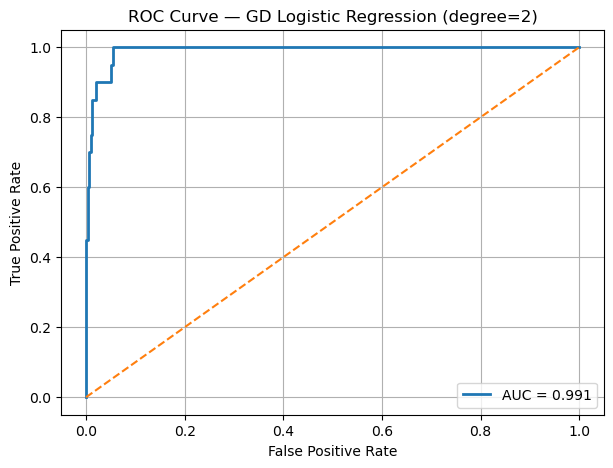

Degree 5 - Val: [0.982, 0.7777777777777778, 0.7368421052631579]
Degree 5 - Test: [0.982, 0.7391304347826086, 0.85]


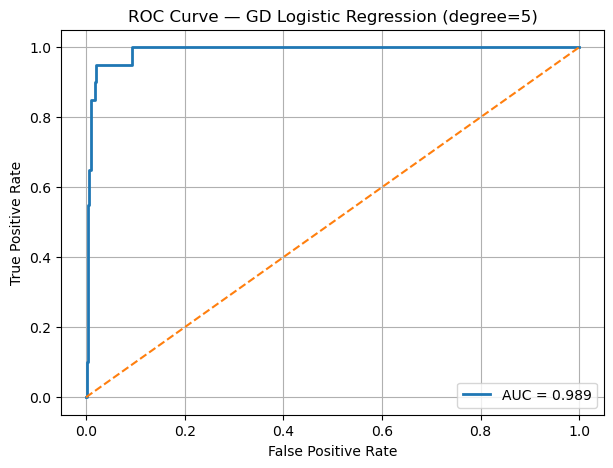

C:\Users\alaae\AppData\Local\Temp\ipykernel_25828\2320616849.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-z))


Degree 9 - Val: [0.98, 0.7142857142857143, 0.7894736842105263]
Degree 9 - Test: [0.974, 0.6296296296296297, 0.85]


C:\Users\alaae\AppData\Local\Temp\ipykernel_25828\2320616849.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-z))


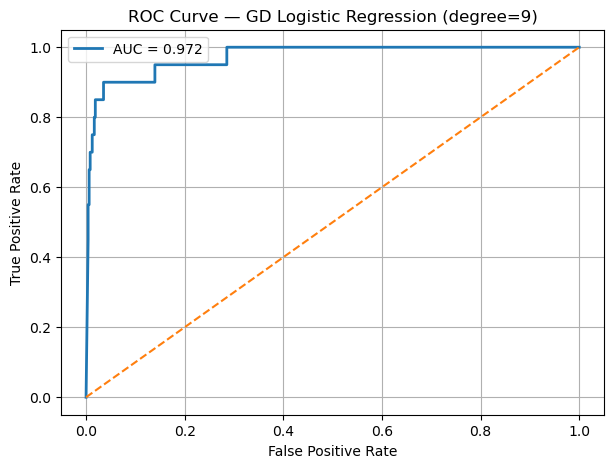

In [28]:

for d in [2, 5, 9]:
    poly = PolynomialFeatures(degree=d, include_bias=True)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_val_poly   = poly.transform(X_val_scaled)
    X_test_poly  = poly.transform(X_test_scaled)

    n, m = X_train_poly.shape
    epoch = 10000
    learning_rate = 0.01
    w = np.zeros((m, 1))

    # train with gradient descent
    w_trained = GradientDecent(n, epoch, learning_rate, X_train_poly, w, y_train)

    # predictions (0/1) for metrics
    y_val_pred  = predict(X_val_poly,  w_trained)
    y_test_pred = predict(X_test_poly, w_trained)

    print("Degree", d, "- Val:",  metrics2(y_val,  y_val_pred))
    print("Degree", d, "- Test:", metrics2(y_test, y_test_pred))

    y_test_proba = predict_output(X_test_poly, w_trained).ravel()  # shape (n_test,)

    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    AUC = auc(fpr, tpr)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {AUC:.3f}")
    plt.plot([0, 1], [0, 1], '--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve — GD Logistic Regression (degree={d})")
    plt.grid(True)
    plt.legend()
    plt.show()